# Bilateral Filtering

---


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

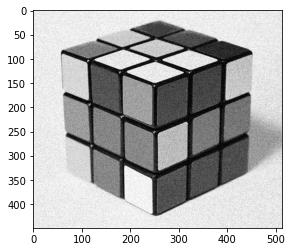

Image shape:  (449, 513)


In [2]:
img = cv2.imread('./images/rubiks_cube.png', 0)
plt.imshow(img, cmap='gray')
plt.show()

print('Image shape: ', img.shape)

In [3]:
filter_size = 5
spread = (filter_size - 1) // 2
sigma_d = 1
s_d_squared = 2 * sigma_d * sigma_d

gaussian_filter = np.zeros((filter_size, filter_size))
print(gaussian_filter)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [4]:
for i in range(-spread, spread + 1):
  for j in range(-spread, spread + 1):
    gaussian_filter[i + spread][j + spread] = np.exp(-((i ** 2) + (j ** 2)) / s_d_squared) / (np.pi * s_d_squared)

print(gaussian_filter)

[[0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.02153928 0.09653235 0.15915494 0.09653235 0.02153928]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]]


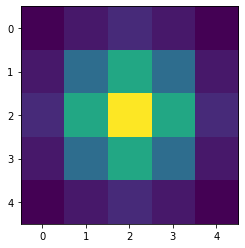

In [5]:
plt.imshow(gaussian_filter)
plt.show()

[[3.15534563e-10 1.61824586e-07 3.86129411e-03 3.09876110e-03
  6.36619772e-03]
 [6.36619772e-03 7.07220685e-05 2.37246109e-08 5.66092599e-04
  6.24013856e-03]
 [9.76454206e-06 8.61571172e-04 6.36619772e-03 8.61571172e-04
  3.80445434e-05]
 [2.37246109e-08 1.26312332e-04 5.66092599e-04 3.09876110e-03
  7.07220685e-05]
 [4.62280835e-03 3.57364999e-04 5.79417625e-13 1.96633730e-05
  6.32131877e-08]]


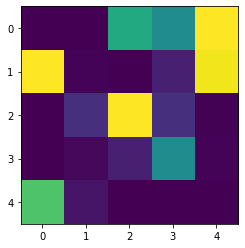

Sum of Range(Intensity Filter) 0.04356855066512018


In [6]:
intensity_filter = np.zeros((filter_size, filter_size))

s = 5
s_r_sqrd = 2 * s ** 2
for i in range(-spread, spread + 1):
    for j in range(-spread, spread + 1):
        diff = img[spread][spread] - img[spread + i][spread + j]
        intensity_filter[i + spread][j + spread] = np.exp(-diff ** 2 / s_r_sqrd) / (np.pi * s_r_sqrd)

print(intensity_filter)

plt.imshow(intensity_filter)
plt.show()

print("Sum of Range(Intensity Filter)", np.sum(intensity_filter))

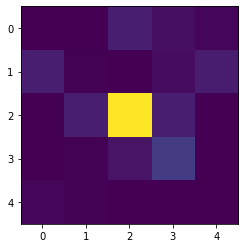

[[9.19790970e-13 2.11411414e-09 8.31694922e-05 4.04829380e-05
  1.85576221e-05]
 [8.31694922e-05 4.14076519e-06 2.29019251e-09 3.31446263e-05
  8.15226259e-05]
 [2.10321199e-07 8.31694922e-05 1.01321184e-03 8.31694922e-05
  8.19452045e-07]
 [3.09943852e-10 7.39556577e-06 5.46462504e-05 1.81431941e-04
  9.23929601e-07]
 [1.34755994e-05 4.66869972e-06 1.24802380e-14 2.56886892e-07
  1.84267989e-10]]


In [7]:
plt.imshow(np.multiply(gaussian_filter, intensity_filter))
plt.show()

print(np.multiply(gaussian_filter, intensity_filter))

In [8]:
def convolve(img, kernel, kernel_size: int):
    # Getting image shape, kernel size and padding size
    image_width, image_height = img.shape[:2]
    padding = (kernel_size - 1) // 2

    padded_img = cv2.copyMakeBorder(img, padding, padding, padding, padding, cv2.BORDER_REPLICATE)

    # Making an empty image for the output image with the same shape as the input image with zero values(black)
    output_img = np.zeros(img.shape, dtype=np.float64)
    sigma_r = 5
    s_r_squared = 2 * sigma_r ** 2
    intensity_filter = np.zeros((filter_size, filter_size))

    # Looping over the image and applying the convolution
    for x in range(padding, image_width + padding):
        for y in range(padding, image_height + padding):
            value = 0.0
            weight = 0.0

            for i in range(-padding, padding + 1):
                for j in range(-padding, padding + 1):
                    intensity_difference = int(padded_img[x + i][y + j]) - int(padded_img[x][y])
                    intensity_filter[i - padding][j - padding] = np.exp(-intensity_difference**2 / s_r_squared) / (np.pi * s_r_squared)
            

            filter = np.multiply(kernel, intensity_filter)
            weight = np.sum(filter)
            
            filter = np.multiply(kernel, intensity_filter)
            for i in range(-padding, padding + 1):
                for j in range(-padding, padding + 1):
                    value += padded_img[x + i, y + j] * filter[i + padding, j + padding]
            output_img[x - padding, y - padding] = value / weight
    
    return output_img

In [9]:
result = np.zeros(img.shape)

print(result.shape)

(449, 513)


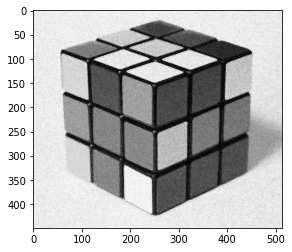

In [10]:
result = convolve(img, gaussian_filter, filter_size)

plt.imshow(result, cmap="gray")
plt.show()

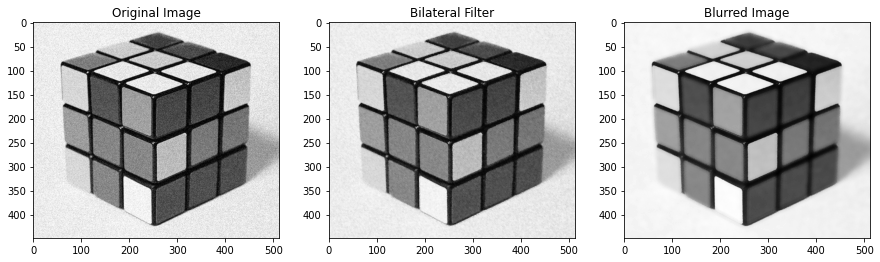

In [11]:
blurred_img = cv2.bilateralFilter(img, 15, 75, 75)

figure, axis = plt.subplots(1, 3, figsize=(15, 15))
axis[0].imshow(img, cmap='gray')
axis[0].set_title('Original Image')
axis[1].imshow(result, cmap='gray')
axis[1].set_title('Bilateral Filter')
axis[2].imshow(blurred_img, cmap='gray')
axis[2].set_title('Blurred Image')
plt.show()

In [12]:
print("Maximum Intensity of the Input/Original Image: ", result.max())
print("Minimum Intensity of the Input/Original Image: ", result.min())
print("Mean Intensity of the Input/Original Image: ", result.mean())
print("Standard Deviation of the Input/Original Image: ", result.std())

print("Shape of the Input/Original image: ", result.shape)
print("Size of the Input/Original image: ", result.size / 1024 ** 2, "MB")
print("Type of the Input/Original image: ", result.dtype)

Maximum Intensity of the Input/Original Image:  254.99999999999253
Minimum Intensity of the Input/Original Image:  2.2289000027227e-22
Mean Intensity of the Input/Original Image:  167.76407591626125
Standard Deviation of the Input/Original Image:  77.60245817933571
Shape of the Input/Original image:  (449, 513)
Size of the Input/Original image:  0.2196664810180664 MB
Type of the Input/Original image:  float64
